In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original,10)
test_labels = to_categorical(test_labels_original,10)
test_labels.shape


(10000, 10)

In [3]:
from keras import models


network = models.Sequential()

network.add(Dense(units = 100, activation = 'relu'))

network.add(Dense(units = 10, activation = 'softmax'))


sgd = keras.optimizers.SGD(lr=0.05)
network.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 30
History = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.6127 - acc: 0.8422 - val_loss: 0.3432 - val_acc: 0.9050
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.3227 - acc: 0.9086 - val_loss: 0.2815 - val_acc: 0.9215
Epoch 3/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2767 - acc: 0.9223 - val_loss: 0.2487 - val_acc: 0.9298
Epoch 4/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2466 - acc: 0.9311 - val_loss: 0.2283 - val_acc: 0.9357
Epoch 5/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2236 - acc: 0.9372 - val_loss: 0.2072 - val_acc: 0.9408
Epoch 6/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.2044 - acc: 0.9424 - val_loss: 0.1949 - val_acc: 0.9451
Epoch 7/

Test loss: 0.09229212553519756
Test accuracy: 0.973


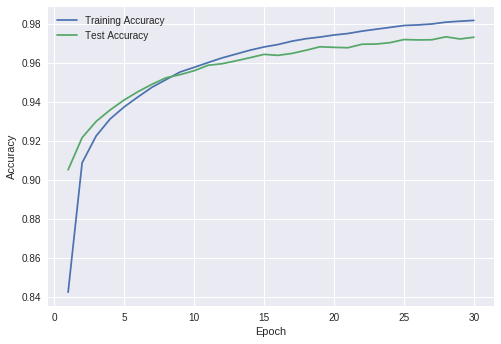

In [4]:
#evaluate function: Returns the loss value & metrics values for the model in test mode
metrics = network.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)